<img src="https://i.imgur.com/6U6q5jQ.png"/>

# Mining Networks

We have networks available. Let's get some information out of them.

* This is the data about Peruvian elites:

In [20]:
import networkx as nx
import os

eliNet=nx.read_graphml(os.path.join('graphdata','Elitenx.graphml'))

* This is the data about international trading

In [22]:
tradeNet=nx.read_graphml(os.path.join('graphdata','trade_graph.graphml'))

* I have also prepared a network from [this article](https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow). There, we have a list of people considered key technological players in Seattle. The article gives their Twitter accounts, so I created a network using those accounts, the links meaning _someone follows someone on Twitter_.   

In [24]:
topsNet=nx.read_graphml(os.path.join('graphdata','SeattleTechTop.graphml'))

## Connectedness

In [25]:
nx.is_connected(eliNet)

False

So we have these people in components, how many?

In [26]:
numComponents=nx.number_connected_components(eliNet)
numComponents

8

What nodes are in each component?:

In [27]:
for c in nx.connected_components(eliNet):
    print (c, '\n')

{'Bustamante', 'Montero', 'Picaso', 'Berckemeyer', 'Fort', 'Wong Lu', 'Llosa Barber', 'Moreyra', 'Romero', 'Piazza', 'Raffo', 'Woodman Pollit', 'Sotomayor', 'Wiese', 'Bentin', 'Ferreyros', 'Michell', 'Rizo Patron', 'Montori', 'Beoutis Ledesma', 'Onrubia', 'Benavides', 'Nicolini', 'De La Puente', 'Graña', 'Brescia', 'Cilloniz', 'Miro Quesada'} 

{'Batievsky Spack', 'Matos Escalada', 'Galsky'} 

{'Lucioni'} 

{'Rodriguez Rodríguez'} 

{'Custer'} 

{'Ikeda'} 

{'Cogorno'} 

{'Arias Davila'} 



A visual representation follows:

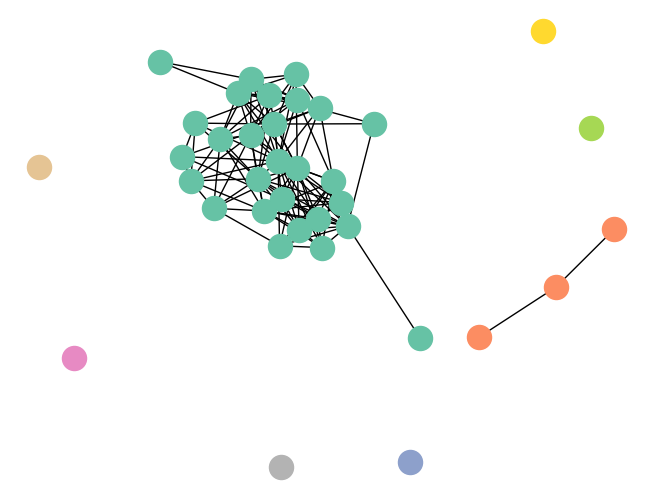

In [31]:
import matplotlib.pyplot as plt

colorsForComponents = plt.get_cmap('Set2',numComponents).colors

nodesPositions=nx.spring_layout(eliNet,k=0.5)

ConnectedComponents =(eliNet.subgraph(c).copy() for c in nx.connected_components(eliNet))

for eachComponent,eachColor in zip(ConnectedComponents,colorsForComponents):
    nx.draw(eachComponent,nodesPositions,node_color=eachColor)

As we do not have ONE connected network but several components, we can pay attention to the Giant Component:

In [33]:
sorted_Components = sorted(nx.connected_components(eliNet), key=len, reverse=True)
eliNet_giant = eliNet.subgraph(sorted_Components[0])

Let's take a look at the Giant Component:

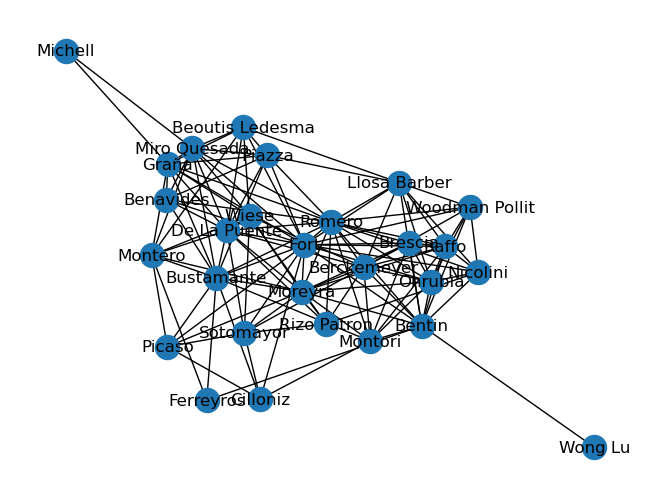

In [34]:
nx.draw(eliNet_giant,with_labels=True)

Basic summary:

In [35]:
# number of edges:
eliNet_giant.size()

133

In [36]:
# number of  nodes:
len(eliNet_giant)

28

The Trade graph is connected:

In [37]:
nx.is_connected(tradeNet)

True

The Top Tech is Seattle graph is connected too:

In [38]:
nx.is_connected(topsNet)

True

____

<a id='part2'></a>

## Network Exploration

<a id='part21'></a>

### Exploring the Network as a whole

* Density: from 0 to 1, where 1 makes it a 'complete' network: there is a link between every pair of nodes.

  <center><img src="https://cdn.fs.guides.co/PDn0ImTfSb6QwgIvdoQ8" width="500"></center>


What can we learn from this?

In [42]:
nx.density(eliNet_giant)

0.35185185185185186

In [43]:
nx.density(tradeNet)

0.2033952594490711

In [44]:
nx.density(topsNet)

0.37971014492753624

* Diameter: worst case escenario for number of steps for a node to contact another one (only for connected component). Also known as _maximum eccentricity_.

<center><img src="https://github.com/EvansDataScience/CTforGA_Networks/raw/main/diameter.jpeg" width="500"></center>

In [45]:
nx.diameter(eliNet_giant)

4

In [46]:
nx.diameter(tradeNet)

6

In [47]:
nx.diameter(topsNet)

3

* Average clustering coefficient: is the average of the local clustering coefficients of the nodes. If all the neighbors of every node are connected among one another, you get 1; if none of them are connected you get zero. 

<center><img src="https://raw.githubusercontent.com/SocialAnalytics-StrategicIntelligence/codes/main/images/LocalClustCoeff.png" width="500"></center>



In [50]:
# count_zeros=False -> to make results compatible with R!
nx.average_clustering(eliNet_giant,count_zeros=False)

0.6537018696117423

In [51]:
nx.average_clustering(tradeNet,count_zeros=False)

0.8091184770981618

In [52]:
nx.average_clustering(topsNet,count_zeros=False)

0.6560694104087448

* Shortest path (average): it gets the average of every shortest path among the nodes in the network. A shorter path is the shortest _walk_ from one node to another.

In [53]:
# the average number of steps it takes to get from one node to another.

nx.average_shortest_path_length(eliNet_giant)

1.7407407407407407

In [54]:
nx.average_shortest_path_length(tradeNet)

2.299927930813581

In [55]:
nx.average_shortest_path_length(topsNet)

1.633816425120773

* **Random networks** have *small shortest path* and *small clustering coefficient*
* **Small world networks** have *small shortest path* and *high clustering coefficient*
* **Regular networks** have *high shortest path* and *high clustering coefficient*
<center><img src="https://github.com/EvansDataScience/CTforGA_Networks/raw/main/networkTypes.jpeg" width="500"></center>


* Transitivity: Tendency of local clustering.

In [59]:
# Probability  that two business men with a common business friend, are also friends.
nx.transitivity(eliNet_giant)

0.5829694323144105

In [60]:
# Probability that two countries with a common trade partner, are also partners.

nx.transitivity(tradeNet)

0.6997204082237525

In [61]:
# Probability that two tech guys with a common colleague, are also colleagues.
nx.transitivity(topsNet)

0.5504252733900364

* Assortativity (degree): it is a measure to see if nodes are connecting to other nodes similar in degree.  Closer to 1 means higher assortativity, closer to -1 diassortativity; while 0 is no assortitivity.

In [62]:
nx.degree_assortativity_coefficient(eliNet_giant)

-0.12086710760602014

In [64]:
nx.degree_assortativity_coefficient(tradeNet)

0.13597674389468284

In [65]:
nx.degree_assortativity_coefficient(topsNet)

-0.2541114236973634

You can also compute assortativity using an attribute of interest:

In [63]:
nx.attribute_assortativity_coefficient(eliNet_giant,'multi')

-0.07258064516129017

In [67]:
nx.attribute_assortativity_coefficient(topsNet,'sex')

0.0632436551198641

<a id='part22'></a>

### Exploration of network communities

A **clique** can be understood a community of nodes where all of them are connected to one another.

* How many cliques do we have?

In [90]:
len(list(nx.enumerate_all_cliques(eliNet_giant)))

1074

In [93]:
#len(list(nx.enumerate_all_cliques(tradeNet)))

In [94]:
len(list(nx.enumerate_all_cliques(topsNet)))

16724

If a clique in the network can not be bigger is you add another node, then you have a **maximal clique**.

<center><img src="https://github.com/EvansDataScience/CTforGA_Networks/raw/main/cliqueMaximal.png" width="500"></center>

* How many maximal cliques are there in this network?

In [74]:
sum(1 for _ in nx.find_cliques(eliNet_giant))

28

In [95]:
sum(1 for _ in nx.find_cliques(tradeNet))

123

In [96]:
sum(1 for _ in nx.find_cliques(topsNet))

221

This is how you see every maximal clique:

In [75]:
for a in nx.find_cliques(eliNet_giant):
    print (a)

['Montero', 'Bustamante', 'De La Puente', 'Graña', 'Miro Quesada']
['Montero', 'Bustamante', 'De La Puente', 'Moreyra']
['Montero', 'Bustamante', 'Picaso', 'Moreyra']
['Montero', 'Bustamante', 'Ferreyros']
['Montero', 'Wiese', 'De La Puente', 'Graña', 'Miro Quesada', 'Beoutis Ledesma']
['Montero', 'Wiese', 'De La Puente', 'Moreyra']
['Michell', 'Graña', 'Miro Quesada']
['Berckemeyer', 'Llosa Barber', 'Raffo', 'Romero', 'Woodman Pollit', 'Onrubia', 'Bentin']
['Berckemeyer', 'Moreyra', 'Wiese', 'Rizo Patron', 'De La Puente', 'Sotomayor']
['Berckemeyer', 'Moreyra', 'Romero', 'Rizo Patron', 'De La Puente']
['Berckemeyer', 'Moreyra', 'Romero', 'Raffo', 'Brescia', 'Onrubia', 'Montori', 'Bentin']
['Rizo Patron', 'Nicolini', 'Romero']
['Fort', 'Picaso', 'Bustamante', 'Moreyra']
['Fort', 'Picaso', 'Bustamante', 'Cilloniz']
['Fort', 'Picaso', 'Sotomayor', 'Moreyra']
['Fort', 'Picaso', 'Sotomayor', 'Cilloniz']
['Fort', 'Sotomayor', 'De La Puente', 'Moreyra']
['Fort', 'Beoutis Ledesma', 'Piazza', 

You can find the size of the _maximum clique_, largest clique in the graph, like this:

In [97]:
max(len(c) for c in nx.find_cliques(eliNet_giant))

8

In [98]:
max(len(c) for c in nx.find_cliques(tradeNet))

51

In [99]:
max(len(c) for c in nx.find_cliques(topsNet))

10

You can see each maximum clique like this:

In [100]:
[c for c in nx.find_cliques(eliNet_giant) if len(c) == max(len(c) for c in nx.find_cliques(eliNet_giant))]

[['Berckemeyer',
  'Moreyra',
  'Romero',
  'Raffo',
  'Brescia',
  'Onrubia',
  'Montori',
  'Bentin'],
 ['Fort',
  'Romero',
  'Bustamante',
  'De La Puente',
  'Benavides',
  'Graña',
  'Miro Quesada',
  'Piazza'],
 ['Fort',
  'Romero',
  'Raffo',
  'Onrubia',
  'Bentin',
  'Woodman Pollit',
  'Nicolini',
  'Llosa Barber']]

If a network presents cliques makes you suspect that there can be **communities**.

This is a huge field of research, let me me show you one of the algorithms known as the [_Louvain method_](https://perso.uclouvain.be/vincent.blondel/research/louvain.html).

This algorithm can be installed using **pip install python-louvain**, and import it using **community**.


In [82]:
import community 
parts = community.best_partition(eliNet_giant)
parts

{'Romero': 0,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 2,
 'Fort': 2,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 0,
 'Brescia': 0,
 'Nicolini': 0,
 'Montero': 1,
 'Picaso': 2,
 'Bentin': 0,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 0,
 'Raffo': 0,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 0,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 2,
 'Montori': 0,
 'Sotomayor': 2,
 'Cilloniz': 2,
 'Ferreyros': 1,
 'Michell': 1,
 'Wong Lu': 0}

You can add that value as an attribute:

In [83]:
nx.set_node_attributes(eliNet_giant, parts,'community')

Now plot this attribute:

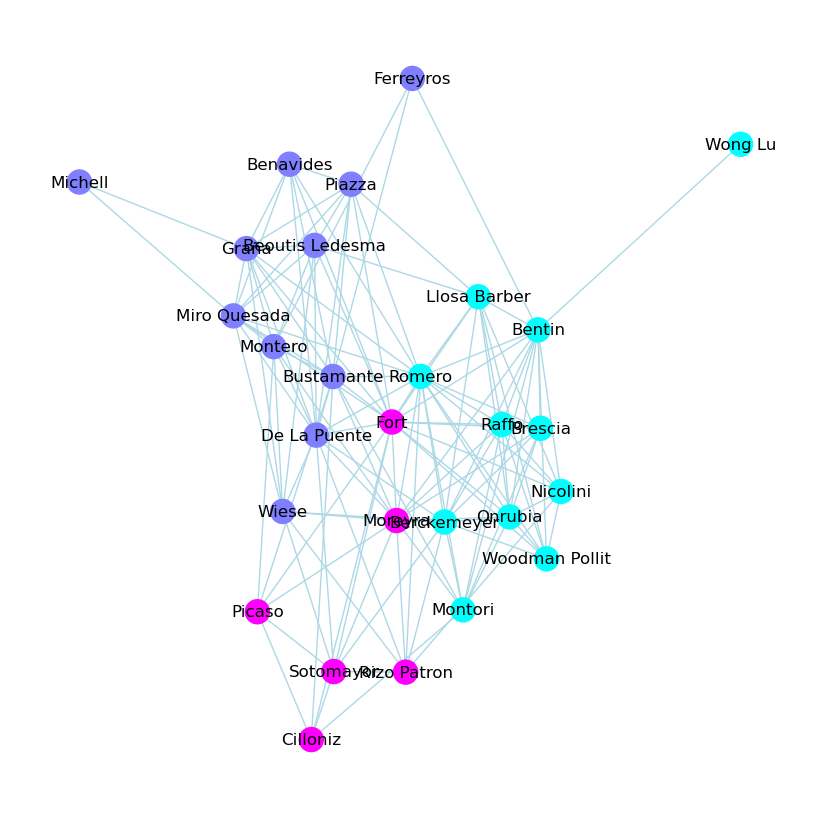

In [84]:
pos=nx.spring_layout(eliNet_giant, k=0.2) 
plt.figure(figsize=(8,8))
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['community'] for n in eliNet_giant.nodes(data=True)]
nx.draw(eliNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True,edge_color='lightblue')

Let's turn our attention to the nodes and their roles in the network.

<a id='part23'></a>

## Exploration of network actors

In [101]:
# Computing centrality measures:
degr=nx.degree_centrality(eliNet_giant)  # based on connections count
clos=nx.closeness_centrality(eliNet_giant) # "speed" to access the rest
betw=nx.betweenness_centrality(eliNet_giant,normalized=True) # "control flow" among the network nodes
eige=nx.eigenvector_centrality(eliNet_giant) # central nodes connected to central nodes (influential?)

In [104]:
# measures into a data frame:
import pandas as pd
Centrality=[ [rich, degr[rich],clos[rich],betw[rich],eige[rich]] for rich in eliNet_giant]
headers=['person','Degree','Closeness','Betweenness','Eigenvector']
DFCentrality=pd.DataFrame(Centrality,columns=headers)
DFCentrality

,person,Degree,Closeness,Betweenness,Eigenvector
0,Romero,0.666667,0.750000,0.102156,0.327919
1,Graña,0.407407,0.613636,0.043353,0.185614
2,Miro Quesada,0.407407,0.613636,0.043353,0.185614
3,Moreyra,0.555556,0.675000,0.065573,0.271159
4,Fort,0.703704,0.771429,0.155165,0.321286
5,De La Puente,0.518519,0.658537,0.039053,0.246994
6,Wiese,0.333333,0.586957,0.017637,0.149863
7,Onrubia,0.407407,0.613636,0.006340,0.222147
8,Brescia,0.296296,0.574468,0.000747,0.178774
9,Nicolini,0.296296,0.562500,0.005603,0.162623


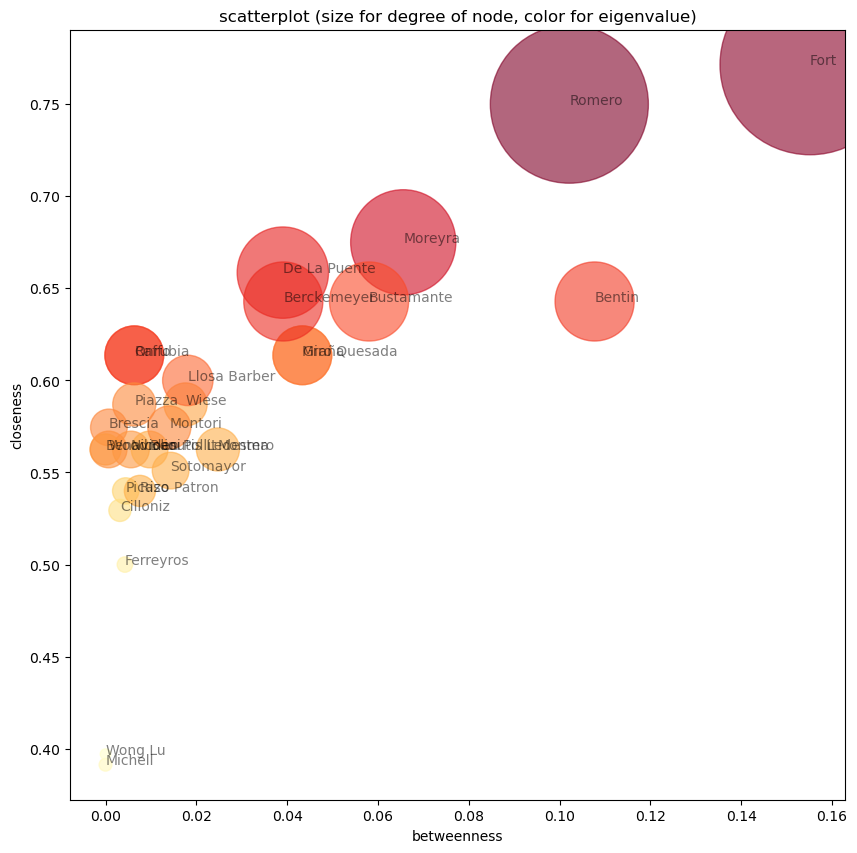

In [105]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
           c=DFCentrality.Eigenvector,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(DFCentrality['person'],DFCentrality['Betweenness'],DFCentrality['Closeness'])
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("scatterplot (size for degree of node, color for eigenvalue)")
plt.xlabel("betweenness")
plt.ylabel("closeness")
plt.show()

### Egonet

The node with the highest degree could be considered a _hub_ in the network:

In [106]:
# degr is a dictionary:
max(degr.keys(), key=(lambda k: degr[k]))

# or you can try:
#DFCentrality['person'].loc[DFCentrality['Degree'].idxmax()]

'Fort'

We can plot the neighbors of the hub, _its ego network_:

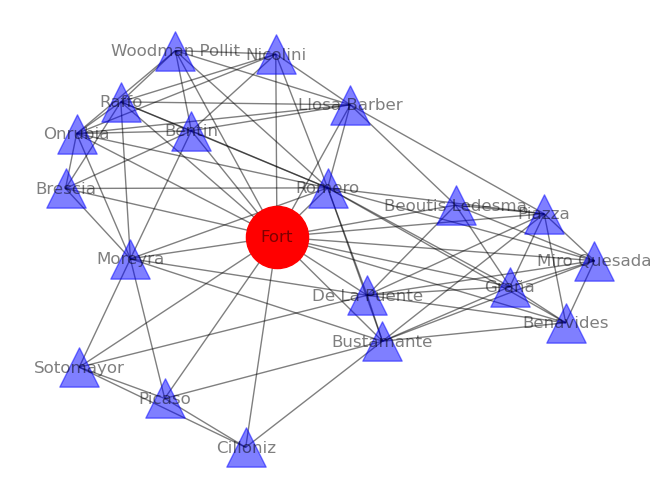

In [107]:
# Determine the hub name:
HubNode=max(degr.keys(), key=(lambda k: degr[k]))

# Get ego network of Hub
HubEgonet=nx.ego_graph(eliNet_giant,HubNode)

# prepare to plot:

## positions of the nodes
pos=nx.spring_layout(HubEgonet)

## plot whole ego network
nx.draw(HubEgonet,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')

## make the hub salient
nx.draw_networkx_nodes(HubEgonet,pos,nodelist=[HubNode],node_size=2000,node_color='r')

plt.show()

Can this network be disconnected? 
If so, we can compute the minimum number of nodes that must be removed to disconnect the network (create at least two components:

In [108]:
nx.node_connectivity(eliNet_giant)

1

Who is the sole node with the power to break the network?

In [109]:
list(nx.articulation_points(eliNet_giant))

['Bentin']

We can highlight the articulation node in the giant component:

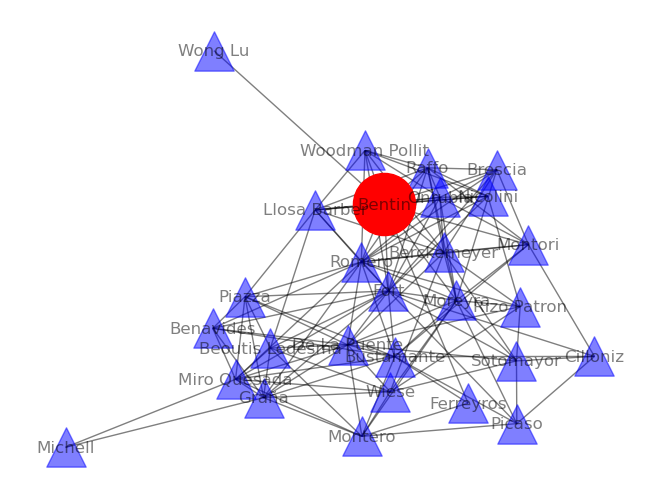

In [110]:
# saving the cut point
cut=list(nx.articulation_points(eliNet_giant))

# positions for all the nodes
pos=nx.spring_layout(eliNet_giant,k=0.5)

# sizes for nodes
SALIENT, NORMAL=(2000,800)

# plot all nodes
nx.draw(eliNet_giant,pos,node_color='b',node_size=NORMAL,with_labels=True, alpha=0.5,node_shape='^')

# make the cut salient:
nx.draw_networkx_nodes(eliNet_giant,pos,nodelist=cut,node_size=SALIENT,node_color='r')
plt.show()